The code below is to calculate the confidence interval over lamba based on exponential distribution: 
$$\frac{2n}{\hat{\lambda}\chi^{2}_{1-\alpha / 2,2n}} < \frac{1}{\lambda} < \frac{2n}{\hat{\lambda}\chi^{2}_{\alpha / 2,2n}}$$

ref: https://en.wikipedia.org/wiki/Exponential_distribution#Bayesian_inference


raw mean 449.1111111111111
naive_mean 448.5
chiRight 2.17973074725265
MLE lambda = 0.002230 (MLE mean = 448.500000)
Lambda C.I. (0.95 confidence) = [0.000608,0.004887] (mean CI = [204.624629,1646.074867]


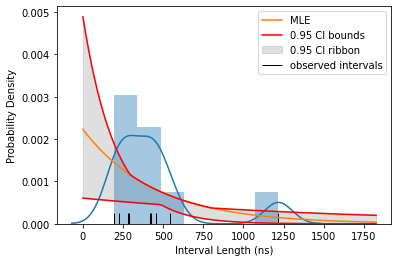

In [6]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
import matplotlib
from scipy.optimize import minimize
import seaborn as sns
from matplotlib import pyplot as plt

def exp_fun(x,lbda):
  return(lbda*np.exp(-lbda*x))

#note: we want to find model function arguments (Args) that
#optimize the residual sum(y-modelFun(x,Args))
def get_residual_function(modelFun,x,y):
  return(lambda args: np.sum((y-modelFun(x,*args))**2))

tempdata=[222,1218,416,282,542,290,192,454,426]
sns.distplot(tempdata)
xvals=np.linspace(0,np.max(tempdata)*1.5,101)
histData=np.histogram(tempdata) #returns (counts, locations)
nzInds=np.nonzero(histData[0]) #need to ignore bins with no count

sampleLocs=(histData[1][1:]+histData[1][:-1])[nzInds]/2.
sampleCounts=histData[0][nzInds]
print("raw mean", np.mean(tempdata))
naiveFit_lambda=(np.sum(sampleCounts*sampleLocs/np.sum(sampleCounts)))**-1
print("naive_mean", naiveFit_lambda**-1)

confidenceLevel=.95
alpha=1-confidenceLevel
chiRight=sp.stats.chi2.ppf(alpha/2.,2*len(sampleLocs))
print("chiRight", chiRight)
chiLeft=sp.stats.chi2.ppf(1-alpha/2.,2*len(sampleLocs))
lambdaMax=(2*len(sampleLocs)*(naiveFit_lambda**-1)/(chiLeft))**-1
lambdaMin=(2*len(sampleLocs)*(naiveFit_lambda**-1)/(chiRight))**-1
print('MLE lambda = %f (MLE mean = %f)'%(
    naiveFit_lambda,naiveFit_lambda**-1))
print('Lambda C.I. (%.2f confidence) = [%f,%f] (mean CI = [%f,%f]'%(
    confidenceLevel,
    lambdaMin,lambdaMax,
    lambdaMax**-1,lambdaMin**-1))

sns.lineplot(xvals,
             exp_fun(xvals,naiveFit_lambda),
             label='MLE')
errDat=np.array(list(zip(
    exp_fun(xvals,lambdaMax),
    exp_fun(xvals,naiveFit_lambda),
    exp_fun(xvals,lambdaMin))))
errMax=np.max(errDat,axis=1)
errMin=np.min(errDat,axis=1)

sns.lineplot(xvals,errMax,color='r',label='%.2f CI bounds'%confidenceLevel)
sns.lineplot(xvals,errMin,color='r')
plt.fill_between(xvals,errMax,errMin,
                 color='grey',alpha=.25,
                 label='%.2f CI ribbon'%confidenceLevel)
sns.rugplot(tempdata,color='black',label='observed intervals')
plt.xlabel('Interval Length (ns)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()